# 读取数据
载入train数据，parse_dates参数将datetime列标记为时间

In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('../data/train.csv', parse_dates=['datetime'])
train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01,0,0,0
1,0,0,1,96.590,1,2021-09-01,0,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1
3,0,0,2,17.314,1,2021-09-01,0,3,1
4,0,0,3,2.904,0,2021-09-01,0,4,2


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018352 entries, 0 to 2018351
Data columns (total 9 columns):
 #   Column              Dtype         
---  ------              -----         
 0   county              int64         
 1   is_business         int64         
 2   product_type        int64         
 3   target              float64       
 4   is_consumption      int64         
 5   datetime            datetime64[ns]
 6   data_block_id       int64         
 7   row_id              int64         
 8   prediction_unit_id  int64         
dtypes: datetime64[ns](1), float64(1), int64(7)
memory usage: 138.6 MB


将时间特征拆分以利于分析

In [4]:
train['year'] = train['datetime'].apply(lambda x: x.year)
train['month'] = train['datetime'].apply(lambda x: x.month)
train['day'] = train['datetime'].apply(lambda x: x.day)
train['hour'] = train['datetime'].apply(lambda x: x.hour)
train.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,month,day,hour
0,0,0,1,0.713,0,2021-09-01,0,0,0,2021,9,1,0
1,0,0,1,96.590,1,2021-09-01,0,1,0,2021,9,1,0
2,0,0,2,0.000,0,2021-09-01,0,2,1,2021,9,1,0
3,0,0,2,17.314,1,2021-09-01,0,3,1,2021,9,1,0
4,0,0,3,2.904,0,2021-09-01,0,4,2,2021,9,1,0


In [5]:
train.corr().loc['target']

county               -0.098594
is_business           0.162962
product_type          0.174963
target                1.000000
is_consumption        0.204345
datetime              0.037881
data_block_id         0.037853
row_id                0.037907
prediction_unit_id   -0.108852
year                  0.038689
month                -0.019436
day                  -0.003247
hour                  0.017672
Name: target, dtype: float64

# 电量与时间的关联性

## 消费电量与小时的关联
判断一个地区的一天中，消费电量和小时的相关性，以地区0，1，2，3, 4, 5为例, 指定data_block_id = 1

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='hour', ylabel='target'>

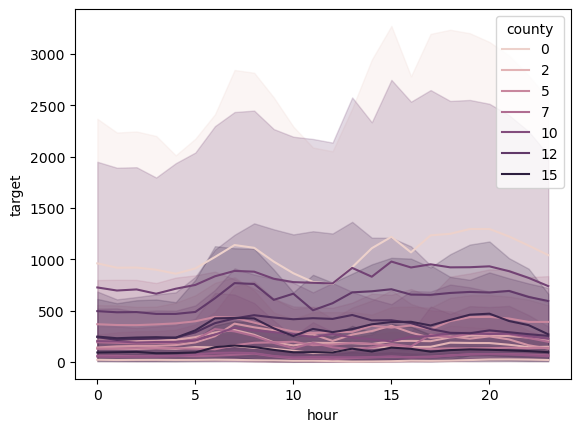

In [7]:
train_corr_hour = train[(train['data_block_id'] == 1) & (train['is_consumption'] == 1)]
sns.lineplot(data=train_corr_hour, x='hour', y='target', hue='county')

### 非商业消费电量与小时的关联
指定**is_business=0**

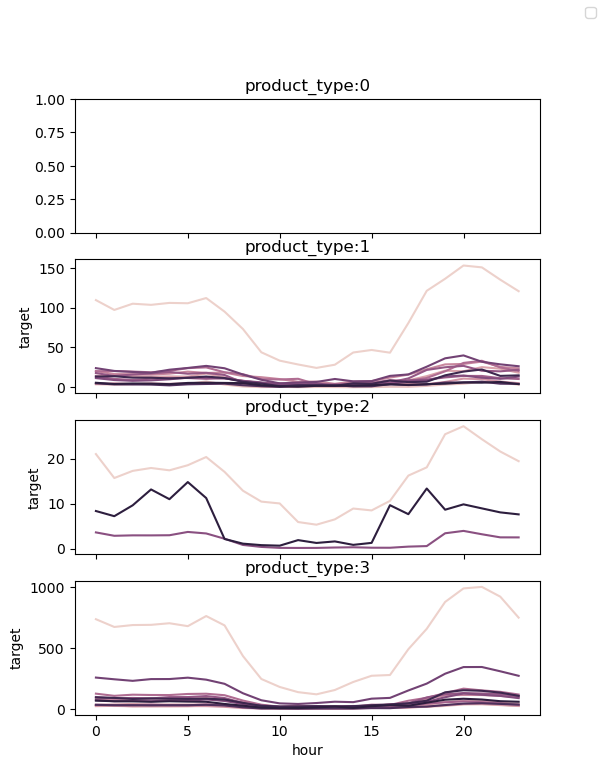

In [8]:
figure, axes = plt.subplots(4, 1, sharex=True, figsize=(6, 8))
data = train_corr_hour[train_corr_hour['is_business'] == 0]
for i, ax in enumerate(axes.ravel()):
    data_temp = data[data['product_type'] == i]
    axsub = sns.lineplot(data=data_temp, x='hour', y='target', hue='county' ,ax=ax, legend=False)
    axsub.set_title('product_type:'+ str(i))
lines, labels = figure.axes[-1].get_legend_handles_labels()   # 从最后一个子图获得
figure.legend(lines, list(range(15)))

### 商业消费电量与小时的关联
指定**is_business=1**

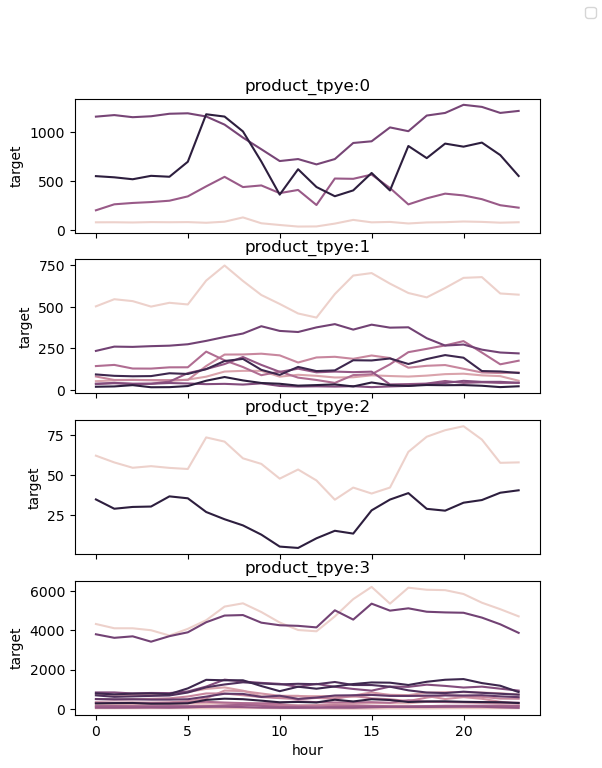

In [9]:
figure, axes = plt.subplots(4, 1, sharex=True, figsize=(6, 8))
data = train_corr_hour[train_corr_hour['is_business'] == 1]
for i, ax in enumerate(axes.ravel()):
    data_temp = data[data['product_type'] == i]
    axsub = sns.lineplot(data=data_temp, x='hour', y='target', hue='county', ax=ax, legend=False)
    axsub.set_title('product_tpye:'+str(i))
lines, labels = figure.axes[-1].get_legend_handles_labels()   # 从最后一个子图获得
figure.legend(lines, list(range(15)))

## 生产电量与小时的关联

### 非商业生产电量与小时的关联
指定is_business=0

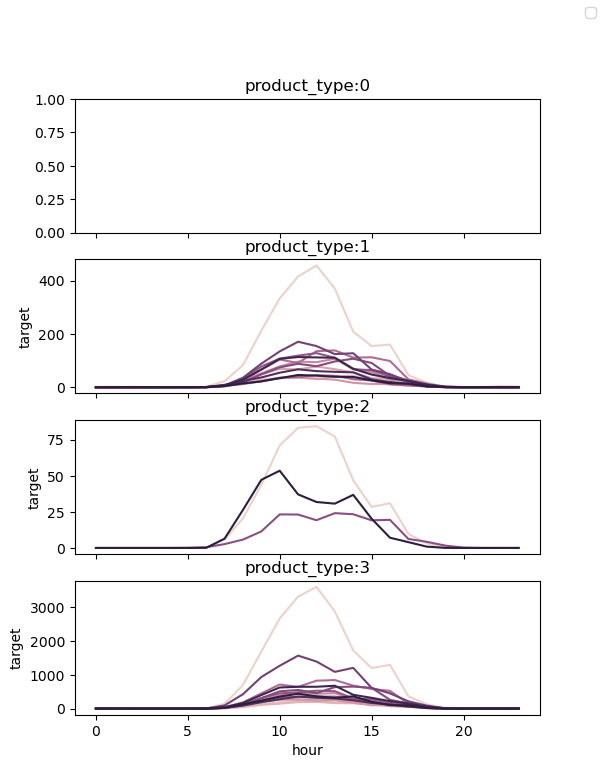

In [10]:
train_corr_hour2 = train[(train['data_block_id'] == 1) & (train['is_consumption'] == 0)]
figure, axes = plt.subplots(4, 1, sharex=True, figsize=(6, 8))
data = train_corr_hour2[train_corr_hour2['is_business'] == 0]
for i, ax in enumerate(axes.ravel()):
    data_temp = data[data['product_type'] == i]
    axsub = sns.lineplot(data=data_temp, x='hour', y='target', hue='county' ,ax=ax, legend=False)
    axsub.set_title('product_type:'+ str(i))
lines, labels = figure.axes[-1].get_legend_handles_labels()   # 从最后一个子图获得
figure.legend(lines, list(range(15)))

### 商业生产电量与小时的关联
指定is_business=1

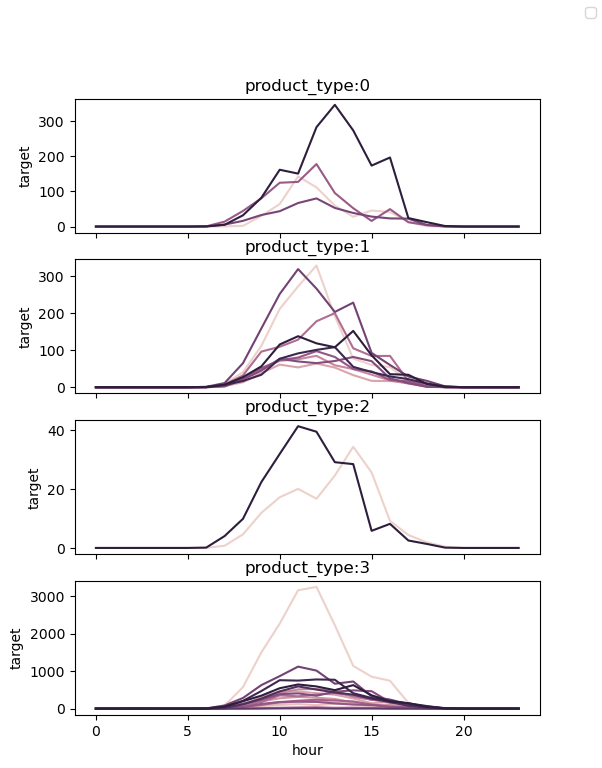

In [11]:
figure, axes = plt.subplots(4, 1, sharex=True, figsize=(6, 8))
data = train_corr_hour2[train_corr_hour2['is_business'] == 1]
for i, ax in enumerate(axes.ravel()):
    data_temp = data[data['product_type'] == i]
    axsub = sns.lineplot(data=data_temp, x='hour', y='target', hue='county' ,ax=ax, legend=False)
    axsub.set_title('product_type:'+ str(i))
lines, labels = figure.axes[-1].get_legend_handles_labels()   # 从最后一个子图获得
figure.legend(lines, list(range(15)))

## 消费电量与月份的关联

In [12]:
# 取每天的消费电量均值
train_corr_month = train[train['is_consumption'] == 1]
train_corr_month_iscp = train_corr_month.groupby(['is_business', 'month']).mean()
train_corr_month_iscp

county  product_type      target  is_consumption  \
is_business month                                                       
0           1      7.162389      2.000000  207.786956             1.0   
            2      7.163075      2.000000  198.808552             1.0   
            3      7.164108      2.000000  161.828711             1.0   
            4      7.132450      2.000000  115.041633             1.0   
            5      7.158405      2.000000   82.251344             1.0   
            6      7.161290      2.000000   46.731028             1.0   
            7      7.166667      2.000000   48.895270             1.0   
            8      7.166667      2.000000   52.884886             1.0   
            9      7.245902      2.016393   69.991930             1.0   
            10     7.161290      2.000000   95.086368             1.0   
            11     7.161290      2.000000  151.654566             1.0   
            12     7.098361      2.000000  226.129526             1.0   
1           1      7.363845      1.828887  912.849411             1.0   
            2      7.374441      1.777225  911.920625             1.0   
            3      7.363883      1.776072  819.492098             1.0   
            4      7.401654      1.779412  658.343556             1.0   
            5      7.514795      1.784160  597.788646             1.0   
            6      7.388889      1.777778  530.146318             1.0   
            7      7.388889      1.777778  539.938747             1.0   
            8      7.388889      1.777778  654.278575             1.0   
            9      7.417910      1.865672  670.345034             1.0   
            10     7.391304      1.855072  734.572805             1.0   
            11     7.485714      1.857143  822.589184             1.0   
            12     7.448082      1.826006  850.214210             1.0   

                                       datetime  data_block_id        row_id  \
is_business month                                                              
0           1     2022-07-16 16:12:06.977475072     318.195914  9.966708e+05   
            2     2022-08-18 13:09:48.118811904     351.069307  1.101160e+06   
            3     2022-09-17 18:22:24.520910592     381.286395  1.197388e+06   
            4     2022-10-11 05:57:48.874172160     404.769316  1.272027e+06   
            5     2022-11-14 13:21:43.448275712     439.077586  1.382135e+06   
            6     2022-06-15 23:30:00.000000000     287.500000  8.962524e+05   
            7     2022-07-16 11:30:00.000000000     318.000000  9.935964e+05   
            8     2022-08-16 11:30:00.000000000     349.000000  1.091804e+06   
            9     2022-03-20 11:18:11.803278848     199.991803  6.259200e+05   
            10    2022-04-16 23:29:59.999999744     227.500000  7.113446e+05   
            11    2022-05-17 11:30:00.000000000     258.000000  8.075961e+05   
            12    2022-06-19 23:18:11.803278848     291.491803  9.130309e+05   
1           1     2022-07-23 13:01:24.452621824     325.063477  1.018744e+06   
            2     2022-08-16 00:07:35.594231552     348.526106  1.092984e+06   
            3     2022-09-12 04:04:01.354401792     375.690293  1.179381e+06   
            4     2022-10-11 19:08:36.176470784     405.318474  1.273794e+06   
            5     2022-11-15 05:33:26.788511488     439.752393  1.384306e+06   
            6     2022-06-15 23:30:00.000000000     287.500000  8.962591e+05   
            7     2022-07-16 11:30:00.000000000     318.000000  9.936030e+05   
            8     2022-08-16 11:30:00.000000000     349.000000  1.091811e+06   
            9     2022-03-31 02:21:56.417910528     210.619403  6.592714e+05   
            10    2022-04-30 04:53:28.695652096     240.724638  7.531363e+05   
            11    2022-06-02 02:55:42.857142784     273.642857  8.573739e+05   
            12    2022-06-24 20:08:36.931712000     296.360150  9.286244e+05   

                   prediction_unit_id    

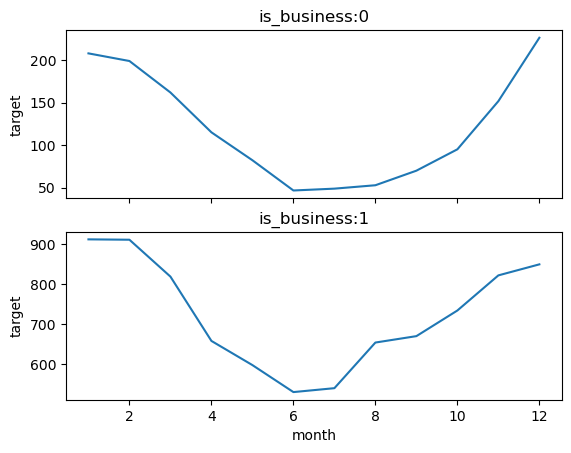

In [13]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=train_corr_month_iscp.loc[i], x='month', y='target', ax=ax)
    ax.set_title('is_business:'+str(i))

## 生产电量与月份的关联

In [14]:
train_corr_month = train[train['is_consumption'] == 0]
train_corr_month_nocp = train_corr_month.groupby(['is_business', 'month']).mean()
train_corr_month_nocp

county  product_type      target  is_consumption  \
is_business month                                                       
0           1      7.162389      2.000000    4.436683             0.0   
            2      7.163075      2.000000   20.909345             0.0   
            3      7.164108      2.000000   98.467051             0.0   
            4      7.132450      2.000000  203.286266             0.0   
            5      7.158405      2.000000  277.393634             0.0   
            6      7.161290      2.000000  197.516436             0.0   
            7      7.166667      2.000000  189.432381             0.0   
            8      7.166667      2.000000  183.790166             0.0   
            9      7.245902      2.016393   97.870784             0.0   
            10     7.161290      2.000000   43.929513             0.0   
            11     7.161290      2.000000    8.448930             0.0   
            12     7.098361      2.000000    1.893442             0.0   
1           1      7.363845      1.828887    3.331496             0.0   
            2      7.374441      1.777225   13.187127             0.0   
            3      7.363883      1.776072   66.970305             0.0   
            4      7.401654      1.779412  149.884200             0.0   
            5      7.514795      1.784160  224.578073             0.0   
            6      7.388889      1.777778  178.235194             0.0   
            7      7.388889      1.777778  167.413084             0.0   
            8      7.388889      1.777778  143.049944             0.0   
            9      7.417910      1.865672   80.785034             0.0   
            10     7.391304      1.855072   33.908909             0.0   
            11     7.485714      1.857143    6.145176             0.0   
            12     7.448082      1.826006    1.808420             0.0   

                                       datetime  data_block_id        row_id  \
is_business month                                                              
0           1     2022-07-16 16:12:06.977475072     318.195914  9.966698e+05   
            2     2022-08-18 13:09:48.118811904     351.069307  1.101159e+06   
            3     2022-09-17 18:22:24.520910592     381.286395  1.197387e+06   
            4     2022-10-11 05:57:48.874172160     404.769316  1.272026e+06   
            5     2022-11-14 13:21:43.448275712     439.077586  1.382134e+06   
            6     2022-06-15 23:30:00.000000000     287.500000  8.962514e+05   
            7     2022-07-16 11:30:00.000000000     318.000000  9.935954e+05   
            8     2022-08-16 11:30:00.000000000     349.000000  1.091803e+06   
            9     2022-03-20 11:18:11.803278848     199.991803  6.259190e+05   
            10    2022-04-16 23:29:59.999999744     227.500000  7.113436e+05   
            11    2022-05-17 11:30:00.000000000     258.000000  8.075951e+05   
            12    2022-06-19 23:18:11.803278848     291.491803  9.130299e+05   
1           1     2022-07-23 13:01:24.452621824     325.063477  1.018743e+06   
            2     2022-08-16 00:07:35.594231552     348.526106  1.092983e+06   
            3     2022-09-12 04:04:01.354401792     375.690293  1.179380e+06   
            4     2022-10-11 19:08:36.176470784     405.318474  1.273793e+06   
            5     2022-11-15 05:33:26.788511488     439.752393  1.384305e+06   
            6     2022-06-15 23:30:00.000000000     287.500000  8.962581e+05   
            7     2022-07-16 11:30:00.000000000     318.000000  9.936020e+05   
            8     2022-08-16 11:30:00.000000000     349.000000  1.091810e+06   
            9     2022-03-31 02:21:56.417910528     210.619403  6.592704e+05   
            10    2022-04-30 04:53:28.695652096     240.724638  7.531353e+05   
            11    2022-06-02 02:55:42.857142784     273.642857  8.573729e+05   
            12    2022-06-24 20:08:36.931712000     296.360150  9.286234e+05   

                   prediction_unit_id    

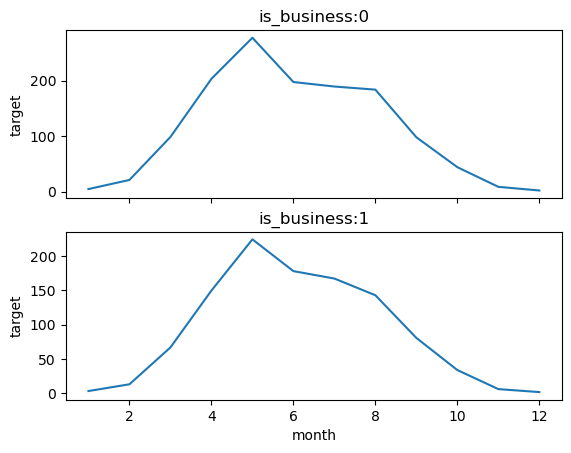

In [15]:
figure, axes = plt.subplots(2, 1, sharex=True)
for i, ax in enumerate(axes.ravel()):
    sns.lineplot(data=train_corr_month_nocp.loc[i], x='month', y='target', ax=ax)
    ax.set_title('is_business:'+str(i))

# 电量与天然气价格的相关性

## 生产电量与天然气价格相关性
先筛选train中的生产数据，即is_consumption=0, 再按照data_block_id分组，计算每天的target均值。随后与天然气价格拼接，计算天然气价格与每日生产电量的相关性

In [16]:
# 读取天然气价格数据
gas_prices = pd.read_csv('../data/gas_prices.csv', parse_dates=['forecast_date'])
gas_prices.head()

,forecast_date,lowest_price_per_mwh,highest_price_per_mwh,origin_date,data_block_id
0,2021-09-01,45.23,46.32,2021-08-31,1
1,2021-09-02,45.62,46.29,2021-09-01,2
2,2021-09-03,45.85,46.40,2021-09-02,3
3,2021-09-04,46.30,46.80,2021-09-03,4
4,2021-09-05,46.30,46.58,2021-09-04,5


In [17]:
train_corr_gas_nocp = train[train['is_consumption'] == 0]
train_corr_gas_nocp = train_corr_gas_nocp.groupby(['is_business', 'data_block_id']).mean()
train_corr_gas_nocp

county  product_type      target  is_consumption  \
is_business data_block_id                                                       
0           0              7.333333      2.033333  115.069124             0.0   
            1              7.333333      2.033333  102.808856             0.0   
            2              7.333333      2.033333   94.174810             0.0   
            3              7.333333      2.033333  116.390099             0.0   
            4              7.333333      2.033333   99.074814             0.0   
...                             ...           ...         ...             ...   
1           633            7.472222      1.777778  510.715931             0.0   
            634            7.472222      1.777778  529.572889             0.0   
            635            7.472222      1.777778  376.484182             0.0   
            636            7.472222      1.777778  344.671758             0.0   
            637            7.472222      1.777778  420.680162             0.0   

                                               datetime        row_id  \
is_business data_block_id                                               
0           0             2021-09-01 11:30:00.000000000  1.460333e+03   
            1             2021-09-02 11:30:00.000000000  4.388333e+03   
            2             2021-09-03 11:30:00.000000000  7.316333e+03   
            3             2021-09-04 11:30:00.000000000  1.024433e+04   
            4             2021-09-05 11:30:00.000000000  1.317233e+04   
...                                                 ...           ...   
1           633           2023-05-27 11:29:59.999999744  2.004290e+06   
            634           2023-05-28 11:29:59.999999744  2.007435e+06   
            635           2023-05-29 11:29:59.999999744  2.010555e+06   
            636           2023-05-30 11:29:59.999999744  2.013675e+06   
            637           2023-05-31 11:29:59.999999744  2.016795e+06   

                           prediction_unit_id    year  month   day  hour  
is_business data_block_id                                                 
0           0                       28.666667  2021.0    9.0   1.0  11.5  
            1                       28.666667  2021.0    9.0   2.0  11.5  
            2                       28.666667  2021.0    9.0   3.0  11.5  
            3                       28.666667  2021.0    9.0   4.0  11.5  
            4                       28.666667  2021.0    9.0   5.0  11.5  
...                                       ...     ...    ...   ...   ...  
1           633                     37.111111  2023.0    5.0  27.0  11.5  
            634                     37.111111  2023.0    5.0  28.0  11.5  
            635                     37.111111  2023.0    5.0  29.0  11.5  
            636                     37.111111  2023.0    5.0  30.0  11.5  
            637                     37.111111  2023.0    5.0  31.0  11.5  

[1276 rows x 11 columns]

In [18]:
# 生产非商业用电与天然气价格的相关性
concat_train_and_gas = pd.merge(left=train_corr_gas_nocp.loc[0], right=gas_prices, on='data_block_id')
concat_train_and_gas = concat_train_and_gas[['target', 'lowest_price_per_mwh', 'highest_price_per_mwh']]
concat_train_and_gas.corr()

,target,lowest_price_per_mwh,highest_price_per_mwh
target,1.000000,0.038585,0.028195
lowest_price_per_mwh,0.038585,1.000000,0.981314
highest_price_per_mwh,0.028195,0.981314,1.000000


In [19]:
# 生产商业用电与天然气价格的相关性
concat_train_and_gas = pd.merge(left=train_corr_gas_nocp.loc[1], right=gas_prices, on='data_block_id')
concat_train_and_gas = concat_train_and_gas[['target', 'lowest_price_per_mwh', 'highest_price_per_mwh']]
concat_train_and_gas.corr()

,target,lowest_price_per_mwh,highest_price_per_mwh
target,1.000000,0.055341,0.044362
lowest_price_per_mwh,0.055341,1.000000,0.981314
highest_price_per_mwh,0.044362,0.981314,1.000000


## 消费电量与天然气价格的相关性
筛选train中的消费数据，并按照天进行分组计算均值，再计算与天然气价格的相关性

In [20]:
train_corr_gas_cp = train[train['is_consumption'] == 1]
train_corr_gas_cp = train_corr_gas_cp.groupby(by=['is_business', 'data_block_id']).mean()
train_corr_gas_cp

county  product_type      target  is_consumption  \
is_business data_block_id                                                       
0           0              7.333333      2.033333   45.465140             1.0   
            1              7.333333      2.033333   50.311067             1.0   
            2              7.333333      2.033333   53.232872             1.0   
            3              7.333333      2.033333   57.691719             1.0   
            4              7.333333      2.033333   60.206969             1.0   
...                             ...           ...         ...             ...   
1           633            7.472222      1.777778  421.390484             1.0   
            634            7.472222      1.777778  400.131644             1.0   
            635            7.472222      1.777778  633.972627             1.0   
            636            7.472222      1.777778  672.262983             1.0   
            637            7.472222      1.777778  638.187287             1.0   

                                               datetime        row_id  \
is_business data_block_id                                               
0           0             2021-09-01 11:30:00.000000000  1.461333e+03   
            1             2021-09-02 11:30:00.000000000  4.389333e+03   
            2             2021-09-03 11:30:00.000000000  7.317333e+03   
            3             2021-09-04 11:30:00.000000000  1.024533e+04   
            4             2021-09-05 11:30:00.000000000  1.317333e+04   
...                                                 ...           ...   
1           633           2023-05-27 11:29:59.999999744  2.004291e+06   
            634           2023-05-28 11:29:59.999999744  2.007436e+06   
            635           2023-05-29 11:29:59.999999744  2.010556e+06   
            636           2023-05-30 11:29:59.999999744  2.013676e+06   
            637           2023-05-31 11:29:59.999999744  2.016796e+06   

                           prediction_unit_id    year  month   day  hour  
is_business data_block_id                                                 
0           0                       28.666667  2021.0    9.0   1.0  11.5  
            1                       28.666667  2021.0    9.0   2.0  11.5  
            2                       28.666667  2021.0    9.0   3.0  11.5  
            3                       28.666667  2021.0    9.0   4.0  11.5  
            4                       28.666667  2021.0    9.0   5.0  11.5  
...                                       ...     ...    ...   ...   ...  
1           633                     37.111111  2023.0    5.0  27.0  11.5  
            634                     37.111111  2023.0    5.0  28.0  11.5  
            635                     37.111111  2023.0    5.0  29.0  11.5  
            636                     37.111111  2023.0    5.0  30.0  11.5  
            637                     37.111111  2023.0    5.0  31.0  11.5  

[1276 rows x 11 columns]

In [21]:
# 消费非商业用电与天然气价格的相关性
concat_train_and_gas = pd.merge(left=train_corr_gas_cp.loc[0], right=gas_prices, on='data_block_id')
concat_train_and_gas = concat_train_and_gas[['target', 'lowest_price_per_mwh', 'highest_price_per_mwh']]
concat_train_and_gas.corr()

,target,lowest_price_per_mwh,highest_price_per_mwh
target,1.000000,-0.312758,-0.286415
lowest_price_per_mwh,-0.312758,1.000000,0.981314
highest_price_per_mwh,-0.286415,0.981314,1.000000


In [22]:
# 消费商业用电与天然气价格的相关性
concat_train_and_gas = pd.merge(left=train_corr_gas_cp.loc[1], right=gas_prices, on='data_block_id')
concat_train_and_gas = concat_train_and_gas[['target', 'lowest_price_per_mwh', 'highest_price_per_mwh']]
concat_train_and_gas.corr()

,target,lowest_price_per_mwh,highest_price_per_mwh
target,1.000000,-0.218970,-0.193933
lowest_price_per_mwh,-0.218970,1.000000,0.981314
highest_price_per_mwh,-0.193933,0.981314,1.000000


**总结电量与天然气价格关系：**天然气价格对生产电量几乎无影响，天然气价格对消费电量有负的影响，且对商业用电的影响程度更大。

# 电量与装机容量的相关性

In [23]:
# 将train和client按照product_type,county,is_business和data_block_id合并
client = pd.read_csv('../data/client.csv', parse_dates=['date'])
train_client = pd.merge(left=train, right=client, on=['product_type', 'county', 'is_business', 'data_block_id'])
train_client.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,month,day,hour,eic_count,installed_capacity,date
0,0,0,1,0.793,0,2021-09-03 00:00:00,2,5856,0,2021,9,3,0,108,952.89,2021-09-01
1,0,0,1,107.129,1,2021-09-03 00:00:00,2,5857,0,2021,9,3,0,108,952.89,2021-09-01
2,0,0,1,2.106,0,2021-09-03 01:00:00,2,5978,0,2021,9,3,1,108,952.89,2021-09-01
3,0,0,1,81.920,1,2021-09-03 01:00:00,2,5979,0,2021,9,3,1,108,952.89,2021-09-01
4,0,0,1,0.955,0,2021-09-03 02:00:00,2,6100,0,2021,9,3,2,108,952.89,2021-09-01


## 消费电量与装机容量的相关性
以county0为例

In [24]:
train_client_cp = train_client[(train_client['is_consumption'] == 1) & (train_client['county'] == 0)]
train_client_cp.head()

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id,year,month,day,hour,eic_count,installed_capacity,date
1,0,0,1,107.129,1,2021-09-03 00:00:00,2,5857,0,2021,9,3,0,108,952.89,2021-09-01
3,0,0,1,81.920,1,2021-09-03 01:00:00,2,5979,0,2021,9,3,1,108,952.89,2021-09-01
5,0,0,1,96.193,1,2021-09-03 02:00:00,2,6101,0,2021,9,3,2,108,952.89,2021-09-01
7,0,0,1,94.536,1,2021-09-03 03:00:00,2,6223,0,2021,9,3,3,108,952.89,2021-09-01
9,0,0,1,99.585,1,2021-09-03 04:00:00,2,6345,0,2021,9,3,4,108,952.89,2021-09-01


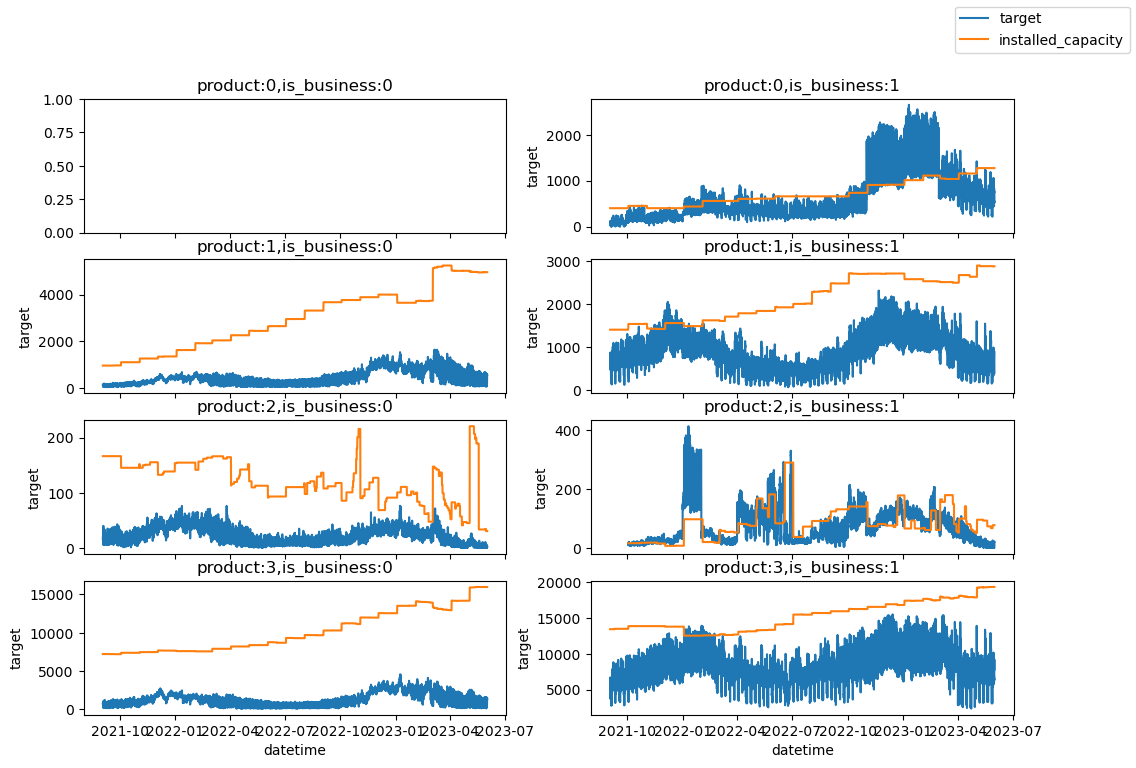

In [25]:
figure, axes = plt.subplots(4, 2, sharex=True, figsize=(12, 8))
for j in range(2):
    for i in range(4):
        data = train_client_cp[(train_client_cp['is_business'] == j) & (train_client_cp['product_type'] == i)]
        ax = axes[i, j]
        sns.lineplot(data=data, x='datetime', y='target', ax=ax, label='target', legend=False)
        sns.lineplot(data=data, x='datetime', y='installed_capacity', ax=ax, label='installed_capacity', legend=False)
        ax.set_title("product:"+str(i)+',is_business:'+str(j))
handels, labels = axes[3, 1].get_legend_handles_labels()
figure.legend(handels, labels)
# # 左侧为消费商业电量，右侧为消费非商业电量

In [26]:
train_client_cp.corr().loc['target']

county                     NaN
is_business           0.318166
product_type          0.496960
target                1.000000
is_consumption             NaN
datetime              0.060294
data_block_id         0.060252
row_id                0.060524
prediction_unit_id   -0.168632
year                  0.057580
month                -0.023018
day                  -0.009849
hour                  0.026458
eic_count             0.237681
installed_capacity    0.811588
date                  0.060252
Name: target, dtype: float64

## 生产电量与装机容量的相关性

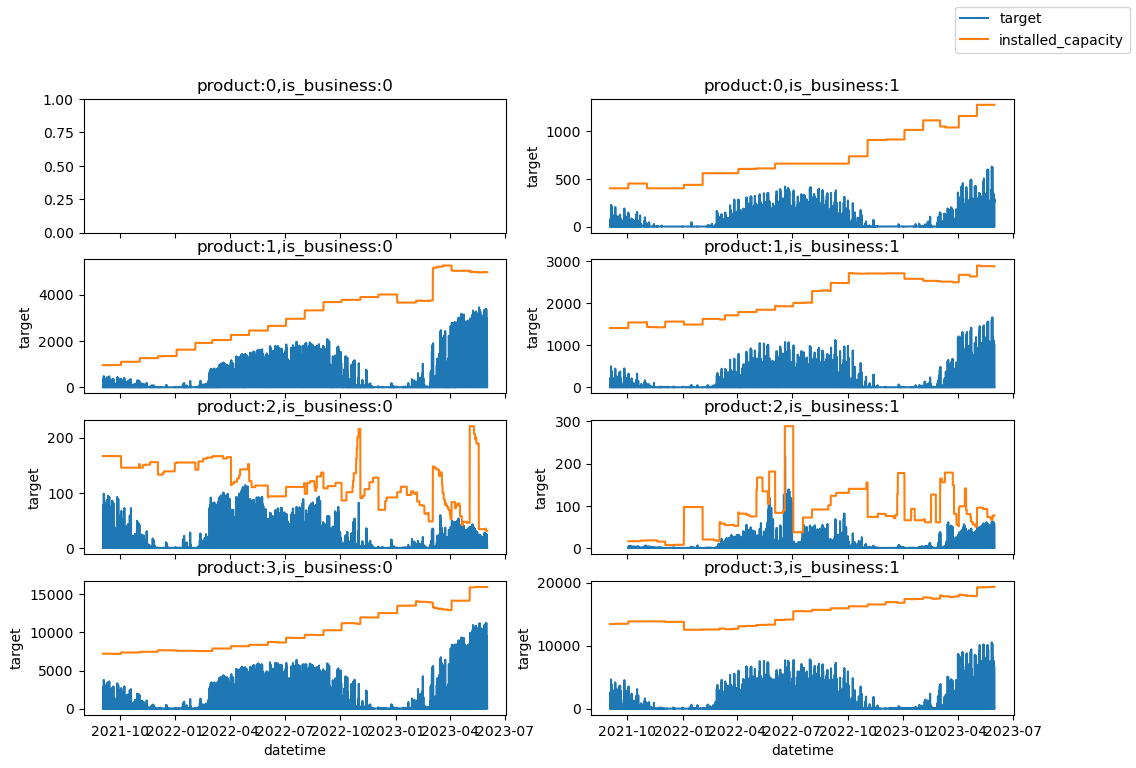

In [27]:
train_client_nocp = train_client[(train_client['is_consumption'] == 0) & (train_client['county'] == 0)]
figure, axes = plt.subplots(4, 2, sharex=True, figsize=(12, 8))
for j in range(2):
    for i in range(4):
        data = train_client_nocp[(train_client_nocp['is_business'] == j) & (train_client_nocp['product_type'] == i)]
        ax = axes[i, j]
        sns.lineplot(data=data, x='datetime', y='target', ax=ax, label='target', legend=False)
        sns.lineplot(data=data, x='datetime', y='installed_capacity', ax=ax, label='installed_capacity', legend=False)
        ax.set_title("product:"+str(i)+',is_business:'+str(j))
handels, labels = axes[3, 1].get_legend_handles_labels()
figure.legend(handels, labels)
# 左侧为生产商业电量，右侧为生产非商业电量

In [28]:
train_client_nocp.corr().loc['target']

county                     NaN
is_business          -0.071353
product_type          0.233148
target                1.000000
is_consumption             NaN
datetime              0.111877
data_block_id         0.111796
row_id                0.111462
prediction_unit_id   -0.100126
year                  0.111449
month                -0.051998
day                   0.002916
hour                  0.051326
eic_count             0.316501
installed_capacity    0.327701
date                  0.111796
Name: target, dtype: float64

**电量与装机容量的相关性总结：**消费电量与装机容量具有比较强的相关性，生产电量与装机容量的相关性比较弱，但是从时间序列来看，与季节的关系比较强

# 电量与电力价格的相关性

In [29]:
electricity_prices = pd.read_csv('../data/electricity_prices.csv', parse_dates=['forecast_date'])
electricity_prices.head()

,forecast_date,euros_per_mwh,origin_date,data_block_id
0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


## 消费电量与电力价格的相关性
以county=0, product_type=1为例

In [30]:
# 筛选county=1, product_type=1
train_corr_electricity_cp = train[(train['is_consumption'] == 1) & (train['county'] == 0) & (train['product_type'] == 1)]
train_corr_electricity_cp = train_corr_electricity_cp.groupby(by=['is_business', 'datetime']).mean()
train_corr_electricity_cp

county  product_type   target  \
is_business datetime                                             
0           2021-09-01 00:00:00     0.0           1.0   96.590   
            2021-09-01 01:00:00     0.0           1.0   77.691   
            2021-09-01 02:00:00     0.0           1.0   91.594   
            2021-09-01 03:00:00     0.0           1.0   87.955   
            2021-09-01 04:00:00     0.0           1.0   88.184   
...                                 ...           ...      ...   
1           2023-05-31 19:00:00     0.0           1.0  761.060   
            2023-05-31 20:00:00     0.0           1.0  827.122   
            2023-05-31 21:00:00     0.0           1.0  808.137   
            2023-05-31 22:00:00     0.0           1.0  870.630   
            2023-05-31 23:00:00     0.0           1.0  889.251   

                                 is_consumption  data_block_id     row_id  \
is_business datetime                                                        
0           2021-09-01 00:00:00             1.0            0.0        1.0   
            2021-09-01 01:00:00             1.0            0.0      123.0   
            2021-09-01 02:00:00             1.0            0.0      245.0   
            2021-09-01 03:00:00             1.0            0.0      367.0   
            2021-09-01 04:00:00             1.0            0.0      489.0   
...                                         ...            ...        ...   
1           2023-05-31 19:00:00             1.0          637.0  2017711.0   
            2023-05-31 20:00:00             1.0          637.0  2017841.0   
            2023-05-31 21:00:00             1.0          637.0  2017971.0   
            2023-05-31 22:00:00             1.0          637.0  2018101.0   
            2023-05-31 23:00:00             1.0          637.0  2018231.0   

                                 prediction_unit_id    year  month   day  hour  
is_business datetime                                                            
0           2021-09-01 00:00:00                 0.0  2021.0    9.0   1.0   0.0  
            2021-09-01 01:00:00                 0.0  2021.0    9.0   1.0   1.0  
            2021-09-01 02:00:00                 0.0  2021.0    9.0   1.0   2.0  
            2021-09-01 03:00:00                 0.0  2021.0    9.0   1.0   3.0  
            2021-09-01 04:00:00                 0.0  2021.0    9.0   1.0   4.0  
...                                             ...     ...    ...   ...   ...  
1           2023-05-31 19:00:00                 4.0  2023.0    5.0  31.0  19.0  
            2023-05-31 20:00:00                 4.0  2023.0    5.0  31.0  20.0  
            2023-05-31 21:00:00                 4.0  2023.0    5.0  31.0  21.0  
            2023-05-31 22:00:00                 4.0  2023.0    5.0  31.0  22.0  
            2023-05-31 23:00:00                 4.0  2023.0    5.0  31.0  23.0  

[30624 rows x 11 columns]

### 非商业消费电量与电力价格的关系

In [31]:
# 按照时间合并电力价格和train数据
concat_train_and_electricity = pd.merge(left=train_corr_electricity_cp.loc[0], right=electricity_prices, 
                                        left_on='datetime', right_on='forecast_date')
concat_train_and_electricity.head()

,county,product_type,target,is_consumption,data_block_id_x,row_id,prediction_unit_id,year,month,day,hour,forecast_date,euros_per_mwh,origin_date,data_block_id_y
0,0.0,1.0,96.590,1.0,0.0,1.0,0.0,2021.0,9.0,1.0,0.0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,0.0,1.0,77.691,1.0,0.0,123.0,0.0,2021.0,9.0,1.0,1.0,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,0.0,1.0,91.594,1.0,0.0,245.0,0.0,2021.0,9.0,1.0,2.0,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,0.0,1.0,87.955,1.0,0.0,367.0,0.0,2021.0,9.0,1.0,3.0,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,0.0,1.0,88.184,1.0,0.0,489.0,0.0,2021.0,9.0,1.0,4.0,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [32]:
# 求target和电力价格的相关性
concat_train_and_electricity[['target', 'euros_per_mwh']].corr()

,target,euros_per_mwh
target,1.000000,-0.008052
euros_per_mwh,-0.008052,1.000000


### 商业消费电量与电力价格的关系

In [33]:
# 按照时间合并电力价格和train数据
concat_train_and_electricity = pd.merge(left=train_corr_electricity_cp.loc[1], right=electricity_prices, 
                                        left_on='datetime', right_on='forecast_date')
# 求target和电力价格的相关性
concat_train_and_electricity[['target', 'euros_per_mwh']].corr()

,target,euros_per_mwh
target,1.00000,0.17022
euros_per_mwh,0.17022,1.00000


## 生产电量与电力价格的相关性
以county=0, product_type=1为例

In [34]:
# 筛选county=1, product_type=1
train_corr_electricity_nocp = train[(train['is_consumption'] == 0) & (train['county'] == 0) & (train['product_type'] == 1)]
train_corr_electricity_nocp = train_corr_electricity_nocp.groupby(by=['is_business', 'datetime']).mean()
train_corr_electricity_nocp

county  product_type   target  \
is_business datetime                                             
0           2021-09-01 00:00:00     0.0           1.0    0.713   
            2021-09-01 01:00:00     0.0           1.0    1.132   
            2021-09-01 02:00:00     0.0           1.0    0.490   
            2021-09-01 03:00:00     0.0           1.0    0.496   
            2021-09-01 04:00:00     0.0           1.0    0.149   
...                                 ...           ...      ...   
1           2023-05-31 19:00:00     0.0           1.0  126.947   
            2023-05-31 20:00:00     0.0           1.0   27.563   
            2023-05-31 21:00:00     0.0           1.0    5.091   
            2023-05-31 22:00:00     0.0           1.0    0.028   
            2023-05-31 23:00:00     0.0           1.0    0.000   

                                 is_consumption  data_block_id     row_id  \
is_business datetime                                                        
0           2021-09-01 00:00:00             0.0            0.0        0.0   
            2021-09-01 01:00:00             0.0            0.0      122.0   
            2021-09-01 02:00:00             0.0            0.0      244.0   
            2021-09-01 03:00:00             0.0            0.0      366.0   
            2021-09-01 04:00:00             0.0            0.0      488.0   
...                                         ...            ...        ...   
1           2023-05-31 19:00:00             0.0          637.0  2017710.0   
            2023-05-31 20:00:00             0.0          637.0  2017840.0   
            2023-05-31 21:00:00             0.0          637.0  2017970.0   
            2023-05-31 22:00:00             0.0          637.0  2018100.0   
            2023-05-31 23:00:00             0.0          637.0  2018230.0   

                                 prediction_unit_id    year  month   day  hour  
is_business datetime                                                            
0           2021-09-01 00:00:00                 0.0  2021.0    9.0   1.0   0.0  
            2021-09-01 01:00:00                 0.0  2021.0    9.0   1.0   1.0  
            2021-09-01 02:00:00                 0.0  2021.0    9.0   1.0   2.0  
            2021-09-01 03:00:00                 0.0  2021.0    9.0   1.0   3.0  
            2021-09-01 04:00:00                 0.0  2021.0    9.0   1.0   4.0  
...                                             ...     ...    ...   ...   ...  
1           2023-05-31 19:00:00                 4.0  2023.0    5.0  31.0  19.0  
            2023-05-31 20:00:00                 4.0  2023.0    5.0  31.0  20.0  
            2023-05-31 21:00:00                 4.0  2023.0    5.0  31.0  21.0  
            2023-05-31 22:00:00                 4.0  2023.0    5.0  31.0  22.0  
            2023-05-31 23:00:00                 4.0  2023.0    5.0  31.0  23.0  

[30624 rows x 11 columns]

### 非商业生产电量与电力价格的关系

In [35]:
# 按照时间合并电力价格和train数据
concat_train_and_electricity = pd.merge(left=train_corr_electricity_nocp.loc[0], right=electricity_prices, 
                                        left_on='datetime', right_on='forecast_date')
concat_train_and_electricity.head()

,county,product_type,target,is_consumption,data_block_id_x,row_id,prediction_unit_id,year,month,day,hour,forecast_date,euros_per_mwh,origin_date,data_block_id_y
0,0.0,1.0,0.713,0.0,0.0,0.0,0.0,2021.0,9.0,1.0,0.0,2021-09-01 00:00:00,92.51,2021-08-31 00:00:00,1
1,0.0,1.0,1.132,0.0,0.0,122.0,0.0,2021.0,9.0,1.0,1.0,2021-09-01 01:00:00,88.90,2021-08-31 01:00:00,1
2,0.0,1.0,0.490,0.0,0.0,244.0,0.0,2021.0,9.0,1.0,2.0,2021-09-01 02:00:00,87.35,2021-08-31 02:00:00,1
3,0.0,1.0,0.496,0.0,0.0,366.0,0.0,2021.0,9.0,1.0,3.0,2021-09-01 03:00:00,86.88,2021-08-31 03:00:00,1
4,0.0,1.0,0.149,0.0,0.0,488.0,0.0,2021.0,9.0,1.0,4.0,2021-09-01 04:00:00,88.43,2021-08-31 04:00:00,1


In [36]:
concat_train_and_electricity[['target', 'euros_per_mwh']].corr()

,target,euros_per_mwh
target,1.000000,-0.040161
euros_per_mwh,-0.040161,1.000000


### 商业生产电量与电力价格的关系

In [37]:
# 按照时间合并电力价格和train数据
concat_train_and_electricity = pd.merge(left=train_corr_electricity_nocp.loc[1], right=electricity_prices, 
                                        left_on='datetime', right_on='forecast_date')
concat_train_and_electricity[['target', 'euros_per_mwh']].corr()

,target,euros_per_mwh
target,1.000000,-0.061221
euros_per_mwh,-0.061221,1.000000


**电量与电力价格的相关性总结**生产和消费电量与电力价格均为弱相关，可以不作为训练特征